In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics
import tqdm
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings. filterwarnings("ignore") 
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
#reading train_data after the feature engineering
# train_data=pd.read_csv("/content/drive/MyDrive/AviationFatalities/feature_eng_train.csv")
train_data=pd.read_csv("/Users/tnagaraghunandan/Desktop/Practice/AppliedAi/Assignment23/dataset/feature_eng_train.csv")
train_data.head(3)

,Unnamed: 0,crew,time,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_f3_alpha_high,eeg_fz_alpha_high,eeg_f4_alpha_high,eeg_c4_alpha_high,eeg_p4_alpha_high,eeg_poz_alpha_high,eeg_c3_alpha_high,eeg_cz_alpha_high,eeg_o2_alpha_high,e
0,0,1,0.011719,-5.28545,26.775801,-9.52731,-12.793200,16.717800,33.737499,23.712299,...,0.006548,0.001229,0.003105,0.004400,0.002121,0.001555,0.005902,0.002539,0.002471,0
1,1,1,0.015625,-2.42842,28.430901,-9.32351,-3.757230,15.969300,30.443600,21.010300,...,0.006550,0.001437,0.003462,0.004586,0.002136,0.001555,0.005902,0.002572,0.002471,0
2,2,1,0.019531,10.67150,30.420200,15.35070,24.724001,16.143101,32.142799,25.431801,...,0.006552,0.001646,0.003818,0.004771,0.002151,0.001555,0.005902,0.002605,0.002471,0


In [3]:
train_data.columns

Index(['Unnamed: 0', 'crew', 'time', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4',
       'eeg_t6', 'eeg_t5', 'eeg_t3',
       ...
       'eeg_f3_alpha_high', 'eeg_fz_alpha_high', 'eeg_f4_alpha_high',
       'eeg_c4_alpha_high', 'eeg_p4_alpha_high', 'eeg_poz_alpha_high',
       'eeg_c3_alpha_high', 'eeg_cz_alpha_high', 'eeg_o2_alpha_high', 'e'],
      dtype='object', length=107)

In [4]:
#seperating into 'X','Y' dataframes
X=train_data.drop(["e","Unnamed: 0"],axis=1)
Y=train_data["e"]
print("Train_Data total pts = ",len(Y))
print('\n')
print("Features names = ",X.columns)
print('\n')
print("Total Features = ",len(X.columns))

Train_Data total pts =  4867421


Features names =  Index(['crew', 'time', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6',
       'eeg_t5', 'eeg_t3', 'eeg_fp2',
       ...
       'eeg_pz_alpha_high', 'eeg_f3_alpha_high', 'eeg_fz_alpha_high',
       'eeg_f4_alpha_high', 'eeg_c4_alpha_high', 'eeg_p4_alpha_high',
       'eeg_poz_alpha_high', 'eeg_c3_alpha_high', 'eeg_cz_alpha_high',
       'eeg_o2_alpha_high'],
      dtype='object', length=105)


Total Features =  105


##Splitting dataframe into train_data and test _data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,stratify=Y,random_state=1)
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (3650565, 105)
y_train shape :  (3650565,)
X_test shape :  (1216856, 105)
y_test shape :  (1216856,)


In [9]:
print(type(X_test.iloc[0]))
print(X_test.iloc[0])

<class 'pandas.core.series.Series'>
crew                    6.000000
time                  234.648438
eeg_fp1                22.662500
eeg_f7                 18.675600
eeg_f8                  9.126970
                         ...    
eeg_p4_alpha_high       0.003006
eeg_poz_alpha_high      0.006073
eeg_c3_alpha_high       0.003312
eeg_cz_alpha_high       0.007793
eeg_o2_alpha_high       0.003570
Name: 3105284, Length: 105, dtype: float64


In [43]:
#Code taken from Cancer Diagnosis Case Study
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    labels = [0,1,2,3]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,4))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [44]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    return test_y, pred_y

##Preprocessing of data

In [45]:
# standardization of data - initialization
std=StandardScaler()
std_trained=[]

In [46]:
#preprocessing filtered ecg,r,heart_rate,resp_rate and gsr signal
features=["ecg","r","gsr","resp_rate","heart_rate"]
for fea in tqdm(features):
    std.fit(X_train[fea].values.reshape(-1,1))
    X_train[fea]=std.transform(X_train[fea].values.reshape(-1,1))
    std_trained.append(std)
    X_test[fea]=std.transform(X_test[fea].values.reshape(-1,1))

100%|█████████████████████████████████████████████| 5/5 [00:37<00:00,  7.52s/it]


In [47]:
# preprocessing eeg electrode data
eeg_features=['eeg_fp1', 'eeg_f7', 'eeg_f8','eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3','eeg_pz', 'eeg_f3',
              'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz','eeg_c3', 'eeg_cz', 'eeg_o2']
for fea in tqdm(eeg_features):
    std.fit(X_train[fea].values.reshape(-1,1))
    X_train[fea]=std.transform(X_train[fea].values.reshape(-1,1))
    std_trained.append(std)
    X_test[fea]=std.transform(X_test[fea].values.reshape(-1,1))

100%|███████████████████████████████████████████| 20/20 [00:53<00:00,  2.65s/it]


In [48]:
# preprocessing potential difference of ectrodes
potential_difference=["fp1_f7","f7_t3","t3_t5","t5_o1","p3_o1","c3_p3","f3_c3","fp1_f3","fz_cz",
"cz_pz","fp2_f4","f4_c4","c4_p4","p4_o2","t6_o2","t4_t6","f8_t4","fp2_f8"]
for fea in tqdm(potential_difference):
    std.fit(X_train[fea].values.reshape(-1,1))
    X_train[fea]=std.transform(X_train[fea].values.reshape(-1,1))
    std_trained.append(std)
    X_test[fea]=std.transform(X_test[fea].values.reshape(-1,1))

100%|███████████████████████████████████████████| 18/18 [00:30<00:00,  1.70s/it]


In [49]:
# preprocessing alpha_low features
features=[i+"_alpha_low" for i in eeg_features]
for fea in tqdm(features):
    std.fit(X_train[fea].values.reshape(-1,1))
    X_train[fea]=std.transform(X_train[fea].values.reshape(-1,1))
    std_trained.append(std)
    X_test[fea]=std.transform(X_test[fea].values.reshape(-1,1))

100%|███████████████████████████████████████████| 20/20 [00:27<00:00,  1.36s/it]


In [50]:
# preprocessing alpha_high features
features=[i+"_alpha_high" for i in eeg_features]
for fea in tqdm(features):
    std.fit(X_train[fea].values.reshape(-1,1))
    X_train[fea]=std.transform(X_train[fea].values.reshape(-1,1))
    std_trained.append(std)
    X_test[fea]=std.transform(X_test[fea].values.reshape(-1,1))

100%|███████████████████████████████████████████| 20/20 [00:16<00:00,  1.19it/s]


In [51]:
# preprocessing theta features
features=[i+"_theta" for i in eeg_features]
for fea in tqdm(features):
    std.fit(X_train[fea].values.reshape(-1,1))
    X_train[fea]=std.transform(X_train[fea].values.reshape(-1,1))
    std_trained.append(std)
    X_test[fea]=std.transform(X_test[fea].values.reshape(-1,1))

100%|███████████████████████████████████████████| 20/20 [00:06<00:00,  3.08it/s]


In [52]:
print(len(std_trained))
# storing standardization of each feature because we need these for transforming feature unseen points
np.save("std",std_trained) 

103


##Random Model

In [ ]:
predicted_y = np.zeros((len(y_test),4))
for i in range(len(y_test)):
    rand_probs = np.random.rand(1,4)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

Log loss on Test Data using Random Model 1.6454441012074448


##Logistic Regression

In [ ]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=3)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: ' + str(LR_search.best_score_))
print('Best Params: ' + str(LR_search.best_params_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=  13.6s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   1.6s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   1.6s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.602 total time= 1.3min
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.599 total time= 1.5min
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.596 total time= 1.7min
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   3.7s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   1.7s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   1.6s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.599 total time= 1.5min
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.595 total time= 1.6min
[CV 3/3] END ................C=0.01, penalty=l2;

In [ ]:
result_logReg=LogisticRegression(penalty='l2',C=10)# fitinng the logistic regression using best tuned model
result_logReg.fit(X_train , y_train)

y_train_hat=result_logReg.predict_proba(X_train)# finding test and train log loss
y_test_hat=result_logReg.predict_proba(X_test)
print("Log Loss for training =",log_loss(y_train,y_train_hat))
print("Log Loss for testing = ",log_loss(y_test,y_test_hat))

Log Loss for training = 0.9409279779612094
Log Loss for testing =  0.941097317231785


Log loss : 0.9207512301150209
Number of mis-classified points : 0.41471875061634245
-------------------- Confusion matrix --------------------


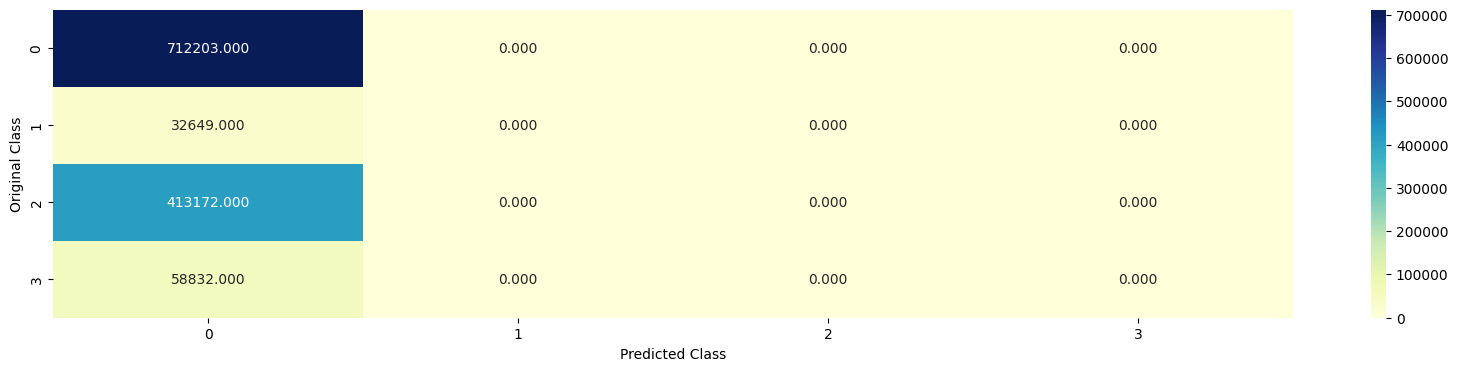

-------------------- Precision matrix (Columm Sum=1) --------------------


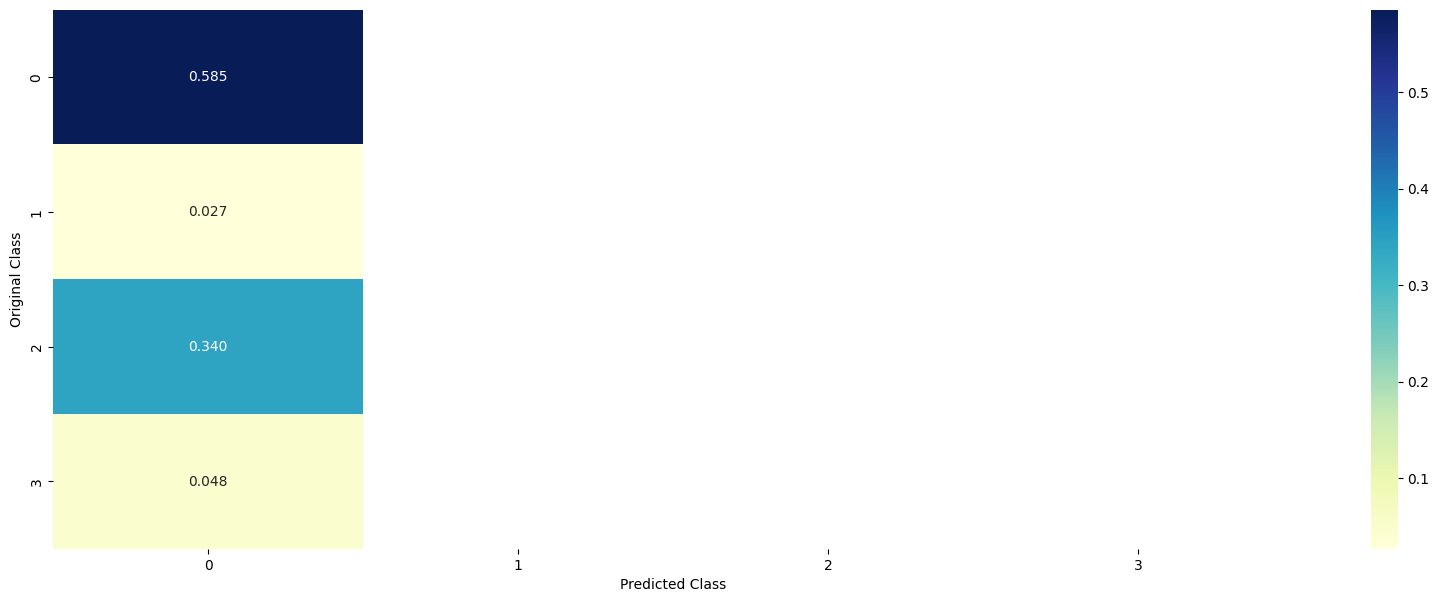

-------------------- Recall matrix (Row sum=1) --------------------


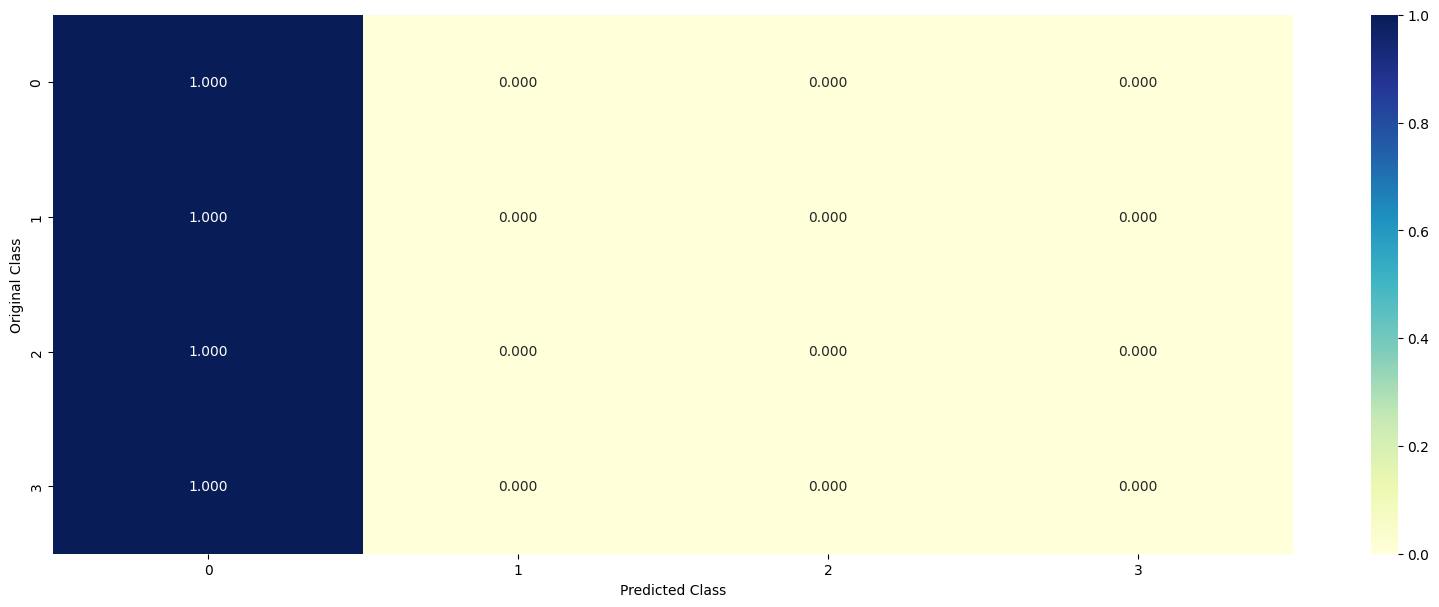

In [ ]:
test_y_lr, pred_y_lr = predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, result_logReg)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(test_y_lr, pred_y_lr))


print(metrics.classification_report(test_y_lr, pred_y_lr))

Accuracy: 0.585
              precision    recall  f1-score   support

           0       0.59      1.00      0.74    712203
           1       0.00      0.00      0.00     32649
           2       0.00      0.00      0.00    413172
           3       0.00      0.00      0.00     58832

    accuracy                           0.59   1216856
   macro avg       0.15      0.25      0.18   1216856
weighted avg       0.34      0.59      0.43   1216856





*   Logistic regression model works better when we compared random model.so linear model works in a decent way.so we can use complex ensembles models like random forest or light gbm to reduce log loss.

*   Precision and Recall shows that class 0 is being categorised with very high accuracy with avg F1 score of 0.18


##Light GBM ( Light Gradient Boosting Machine )

In [17]:
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
# hyper parameter tunning
params = {"n_estimators":[10,20,30,50,100],          
        "num_leaves" : range(1,50),          
        "learning_rate" : [0.00001,0.0001,0.001,0.01,0.1],     
        "bagging_fraction" : list(np.arange(0.0,1.0,0.1)),                    
        "colsample_bytree" : list(np.arange(0.0,1.0,0.1)),  
        'min_data_in_leaf':[1,10,20,50,80,100]
          }
model=lgb.LGBMClassifier() 
clf=RandomizedSearchCV(model,param_distributions=params,verbose=10)
clf.fit(X_train,y_train) # fitting the LGBM model

clf.best_params_ 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bagging_fraction=0.1, colsample_bytree=0.7000000000000001, learning_rate=0.0001, min_data_in_leaf=1, n_estimators=50, num_leaves=18
[CV 1/5; 1/10] END bagging_fraction=0.1, colsample_bytree=0.7000000000000001, learning_rate=0.0001, min_data_in_leaf=1, n_estimators=50, num_leaves=18;, score=0.585 total time= 1.8min
[CV 2/5; 1/10] START bagging_fraction=0.1, colsample_bytree=0.7000000000000001, learning_rate=0.0001, min_data_in_leaf=1, n_estimators=50, num_leaves=18
[CV 2/5; 1/10] END bagging_fraction=0.1, colsample_bytree=0.7000000000000001, learning_rate=0.0001, min_data_in_leaf=1, n_estimators=50, num_leaves=18;, score=0.585 total time= 1.7min
[CV 3/5; 1/10] START bagging_fraction=0.1, colsample_bytree=0.7000000000000001, learning_rate=0.0001, min_data_in_leaf=1, n_estimators=50, num_leaves=18
[CV 3/5; 1/10] END bagging_fraction=0.1, colsample_bytree=0.7000000000000001, learning_rate=0.0001, min_data_in_

{'num_leaves': 48,
 'n_estimators': 30,
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'bagging_fraction': 0.2}

In [18]:
best_params={'num_leaves': 48,
 'n_estimators': 30,
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'bagging_fraction': 0.2}

clf=lgb.LGBMClassifier(objective="multiclass",num_classes=4,metric="multi_logloss",**best_params) # fitting on best hyper parameters
clf.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.2, colsample_bytree=0.5, learning_rate=0.01,
               metric='multi_logloss', min_data_in_leaf=50, n_estimators=30,
               num_classes=4, num_leaves=48, objective='multiclass')

Train log loss = 0.7451213078203663
Test log loss =  0.7452089792689643
TRAIN DATA CONFUSION MATRIX


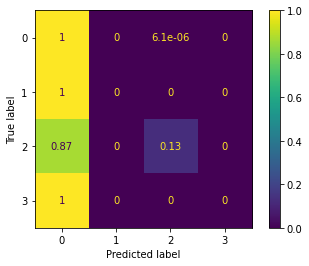

In [19]:
y_train_hat=clf.predict_proba(X_train)
y_test_hat=clf.predict_proba(X_test)
print("Train log loss =",log_loss(y_train,y_train_hat))
print("Test log loss = ",log_loss(y_test,y_test_hat))

# saving the best model on a pickle file
joblib.dump(clf, 'final_model1.pkl')

print("TRAIN DATA CONFUSION MATRIX")
sklearn.metrics.plot_confusion_matrix(clf,X_train,y_train,normalize="true")

In [61]:
joblib.dump(clf, '/Users/tnagaraghunandan/Desktop/Practice/AppliedAi/Assignment23/lgbm.pkl')

NameError: name 'clf' is not defined

TEST DATA CONFUSION MATRIX


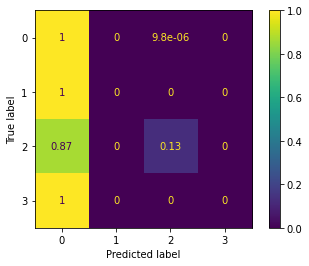

In [20]:
print("TEST DATA CONFUSION MATRIX")
sklearn.metrics.plot_confusion_matrix(clf,X_test,y_test,normalize="true")

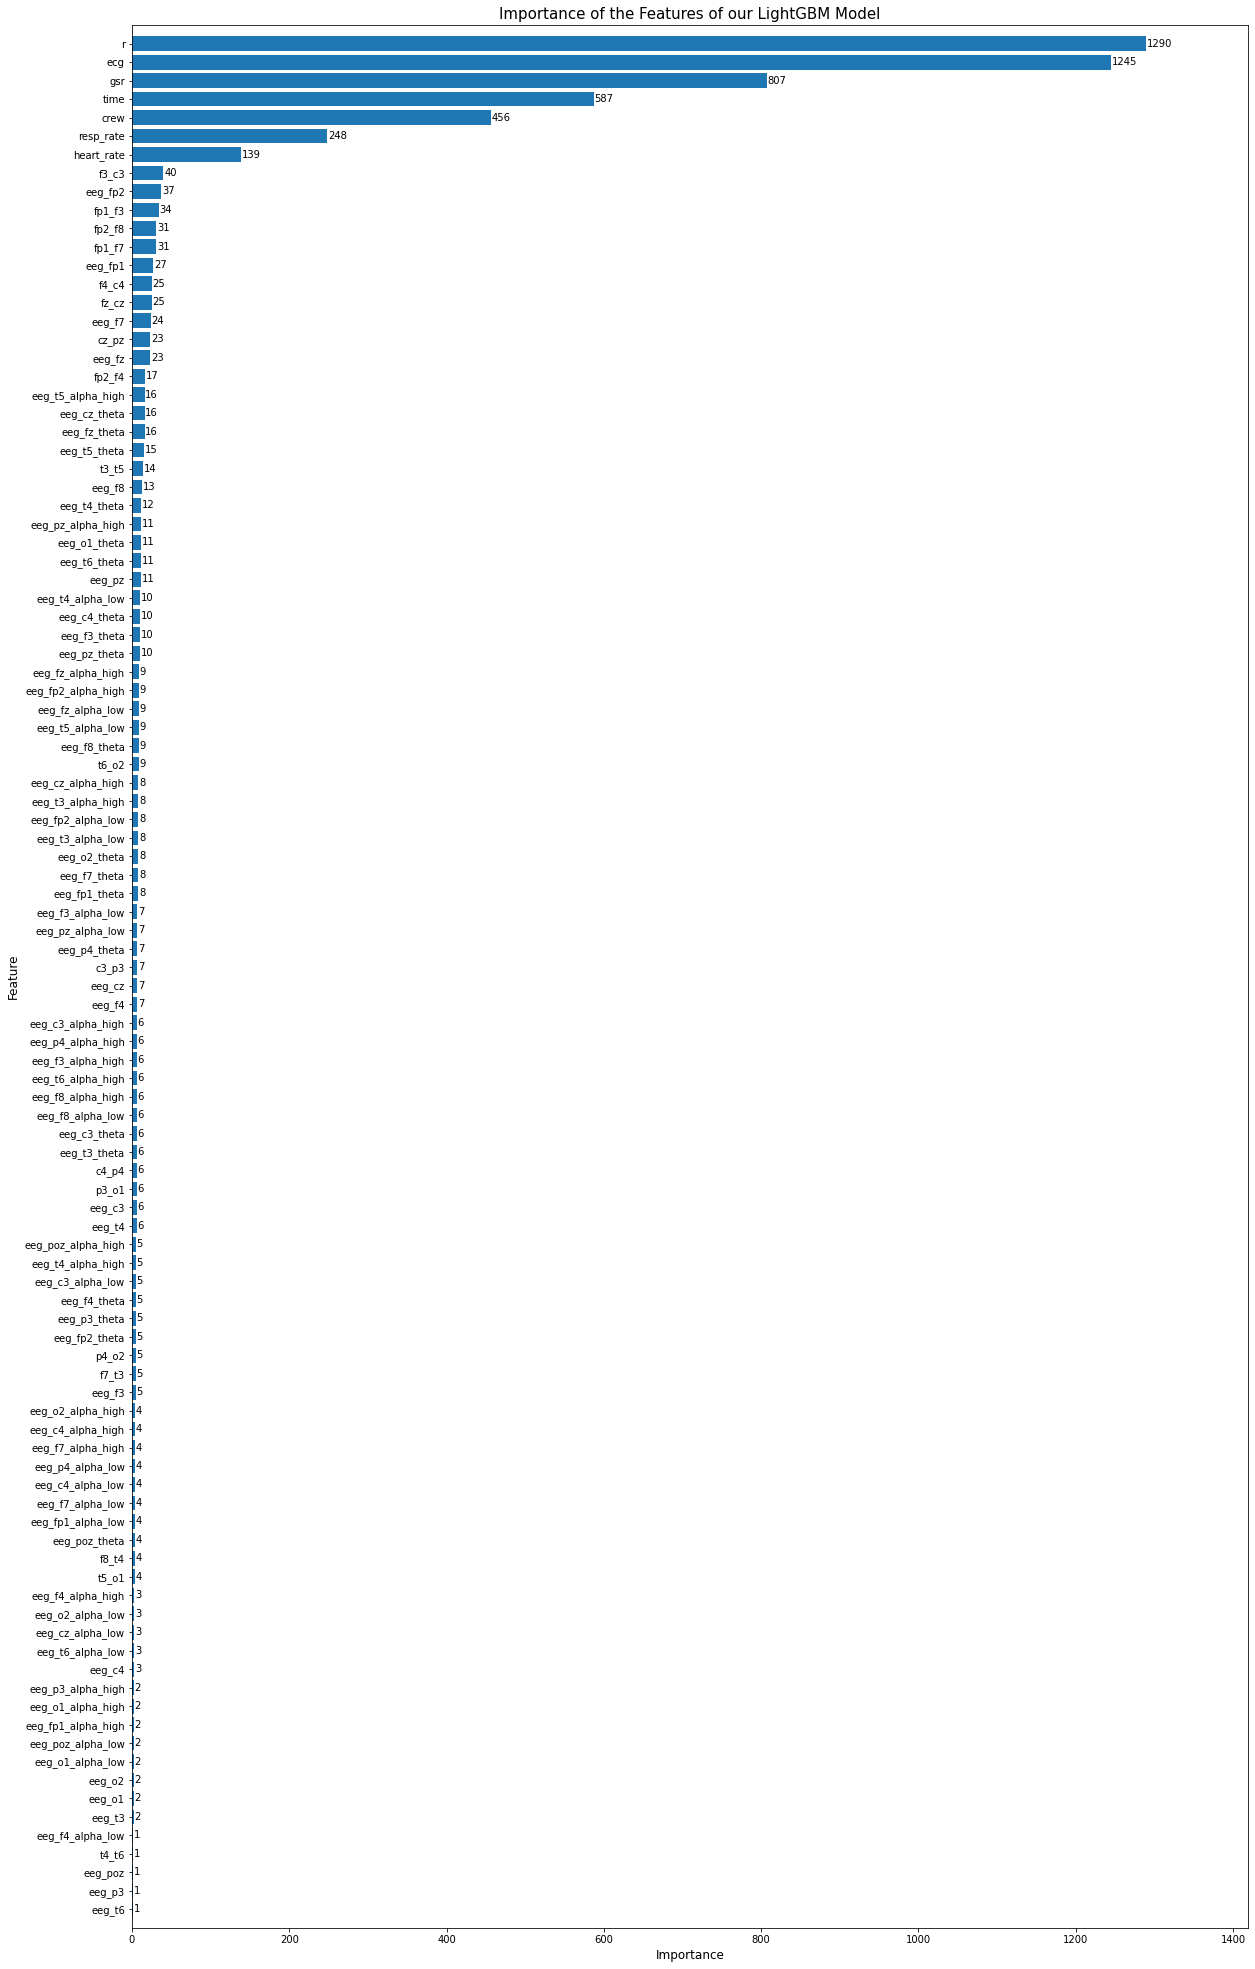

In [21]:
fig, ax = plt.subplots(figsize=(20,35))
lgb.plot_importance(clf, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

Log loss : 0.18242185895901186
Number of mis-classified points : 0.06321865528871123
-------------------- Confusion matrix --------------------


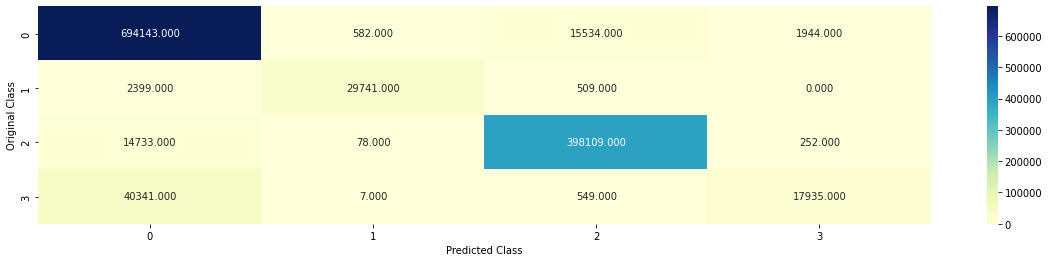

-------------------- Precision matrix (Columm Sum=1) --------------------


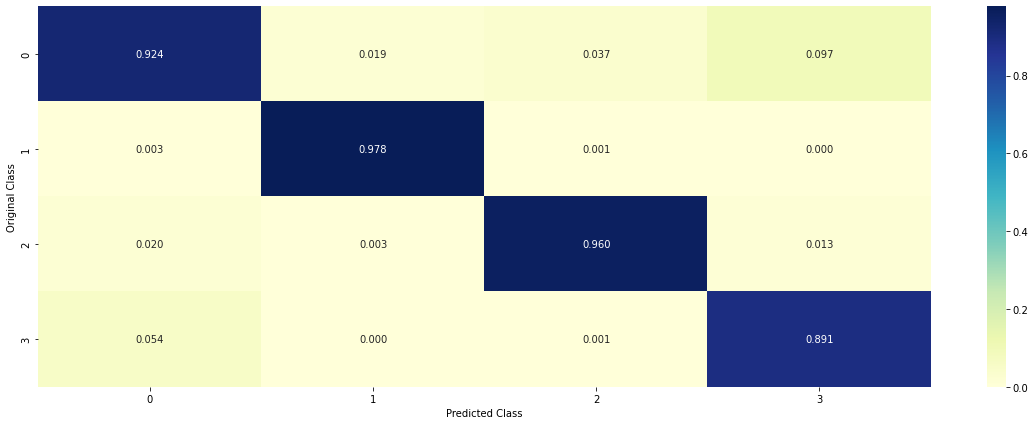

-------------------- Recall matrix (Row sum=1) --------------------


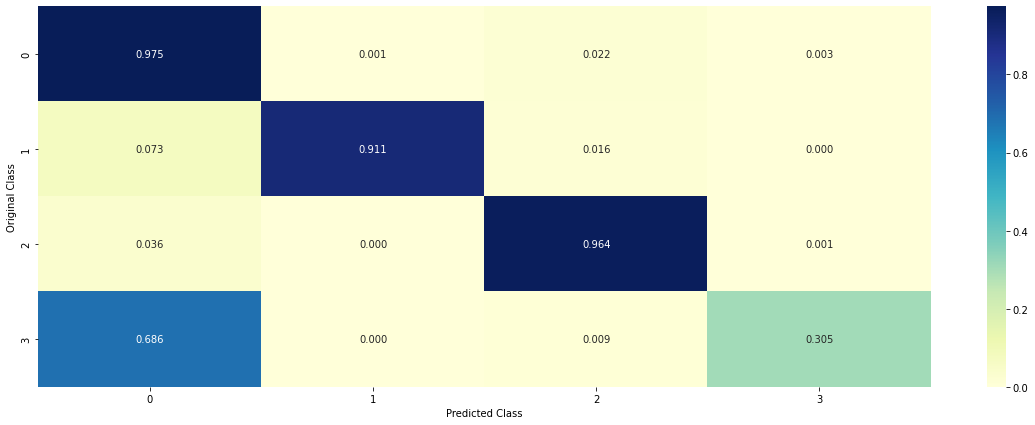

In [23]:
test_y_lgb, pred_y_lgb = predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)

In [24]:
print('Accuracy: %.3f' % accuracy_score(test_y_lgb, pred_y_lgb))


print(metrics.classification_report(test_y_lgb, pred_y_lgb))

Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    712203
           1       0.98      0.91      0.94     32649
           2       0.96      0.96      0.96    413172
           3       0.89      0.30      0.45     58832

    accuracy                           0.94   1216856
   macro avg       0.94      0.79      0.83   1216856
weighted avg       0.94      0.94      0.93   1216856



In [ ]:
joblib.dump(classifier, 'classifier.pkl')

*   LGBM works better when we compared Logistic Regression. We conclude this as we can see the precision and recall matrix.
* Precision matrix shows that almost 90% of the classes what were actuall classes are predicted be the same class.
* Recall matrix tells for 0,1 and 2 class that whatever actual classes were there, more than 90% pts were predicted correctly apart from class 3.
*   Avg F1 scre comes out to 0.94, which is far better than previuos one.



In [53]:
##RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier
# https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
random_forest_cfl=RandomForestClassifier()
prams={
     "n_estimators":[30],
     "max_depth":[5,10,15],
     "min_samples_split":[2,3,4,6],
     "min_samples_leaf": [1,2,3]
}
random_for=RandomizedSearchCV(random_forest_cfl,param_distributions=prams,cv=3,verbose=10,random_state=42)
random_for.fit(X_train,y_train)
print(random_for.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=30
[CV 1/3; 1/10] END max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.784 total time=23.5min
[CV 2/3; 1/10] START max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=30
[CV 2/3; 1/10] END max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.784 total time=23.3min
[CV 3/3; 1/10] START max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=30
[CV 3/3; 1/10] END max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=30;, score=0.790 total time=22.3min
[CV 1/3; 2/10] START max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=30
[CV 1/3; 2/10] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=30;, score=0.701 total time=14.7min
[CV 2/3; 2/10] START max_depth=10, min_samples_leaf=1, min_samples_split=3, n_e

In [55]:
print(random_for.best_estimator_)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=30)


In [56]:
clf_random_forest=RandomForestClassifier()
prams={
     "n_estimators":[30],
     "max_depth":[15],
     "min_samples_split":[4],
     "min_samples_leaf": [2e]
}
clf_random_forest=RandomizedSearchCV(random_forest_cfl,param_distributions=prams,cv=3,verbose=10,random_state=42)
clf_random_forest.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 1/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.776 total time=20.8min
[CV 2/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 2/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.803 total time=22.2min
[CV 3/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 3/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.798 total time=25.7min


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [15],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [4],
                                        'n_estimators': [30]},
                   random_state=42, verbose=10)

Train log loss = 0.6192169397394949
Test log loss =  0.6239892136074852
TRAIN DATA CONFUSION MATRIX


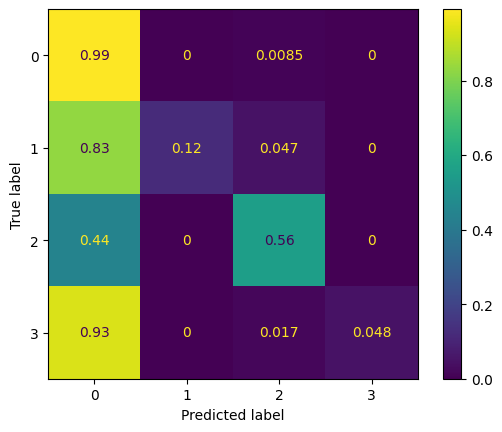

In [57]:
y_train_pred=clf_random_forest.predict_proba(X_train)
y_test_pred=clf_random_forest.predict_proba(X_test)
print("Train log loss =",log_loss(y_train,y_train_pred))
print("Test log loss = ",log_loss(y_test,y_test_pred))

# saving the best model on a pickle file
joblib.dump(clf_random_forest, 'random_forest_clf.pkl')

print("TRAIN DATA CONFUSION MATRIX")
sklearn.metrics.plot_confusion_matrix(clf_random_forest,X_train,y_train,normalize="true")

TEST DATA CONFUSION MATRIX


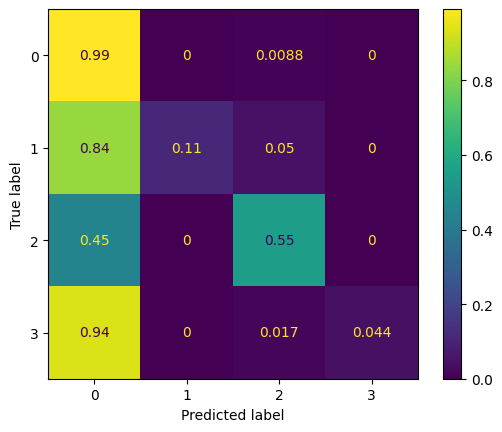

In [58]:
print("TEST DATA CONFUSION MATRIX")
sklearn.metrics.plot_confusion_matrix(clf_random_forest,X_test,y_test,normalize="true")

*   Log loss is good but the model has been running from more than 24hrs. I guess it's better to drop random forest , because in real world if we want this to run, it will take very long time to evaluate, and the accident would have taken place till that time, even if the model gives a great result. So better to drop this.

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 1/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.784 total time=26.1min
[CV 2/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 2/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.782 total time=26.5min
[CV 3/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 3/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.780 total time=21.9min
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30
[CV 1/3; 1/1] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=30;, score=0.768 total time=15.5min
[CV 2/3; 1/1] START max_depth=

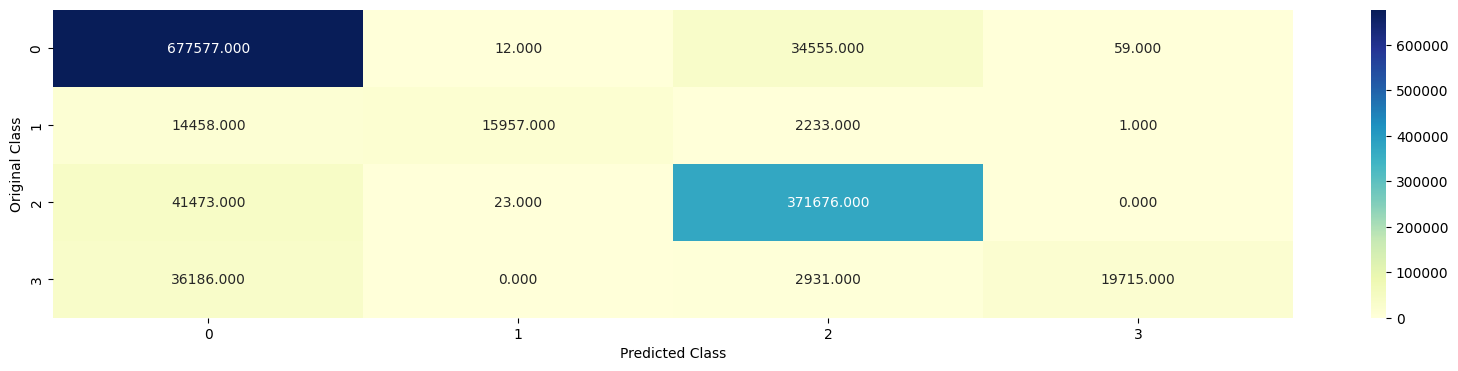

-------------------- Precision matrix (Columm Sum=1) --------------------


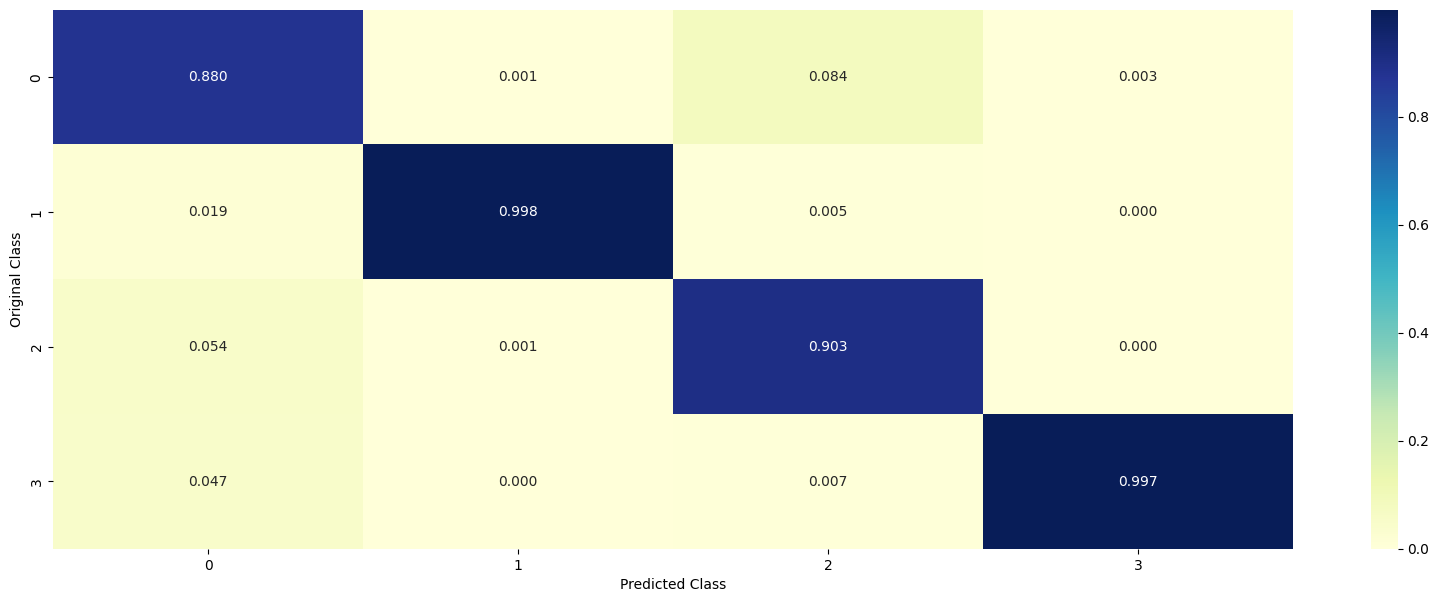

-------------------- Recall matrix (Row sum=1) --------------------


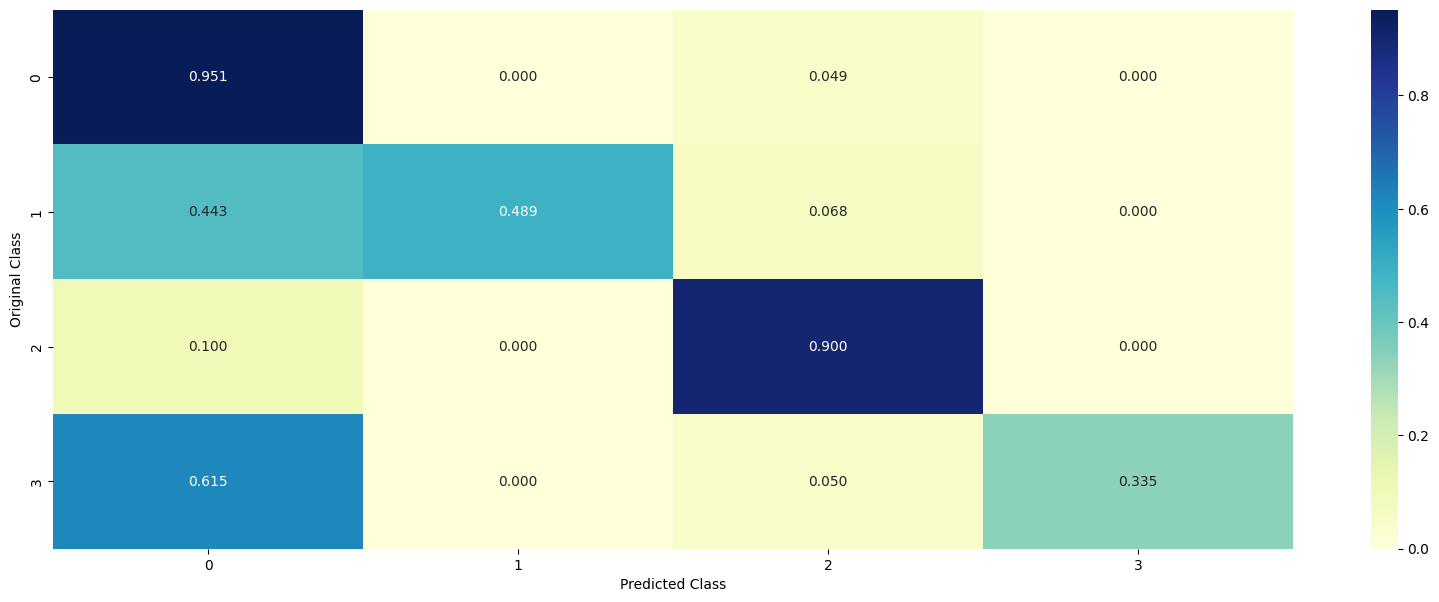

In [59]:
test_y_rf, pred_y_rf = predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, clf_random_forest)

In [60]:
print('Accuracy: %.3f' % accuracy_score(test_y_rf, pred_y_rf))


print(metrics.classification_report(test_y_rf, pred_y_rf))

Accuracy: 0.892
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    712203
           1       1.00      0.49      0.66     32649
           2       0.90      0.90      0.90    413172
           3       1.00      0.34      0.50     58832

    accuracy                           0.89   1216856
   macro avg       0.94      0.67      0.74   1216856
weighted avg       0.90      0.89      0.88   1216856



In [ ]:
from prettytable import PrettyTable 
myTable = PrettyTable(["Sl.no", "Model", "log_loss"]) 
myTable.add_row(["1", "Random Model", "1.645"]) 
myTable.add_row(["2", "Logistic Regression", "0.920" ]) 
myTable.add_row(["3", "Light GBM", "0.1824"]) 
myTable.add_row(["3", "Random Forest", "0.601"]) 
print(myTable)